MODELO DE REGRESIÓN LOGISTICA CON EDAS

In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

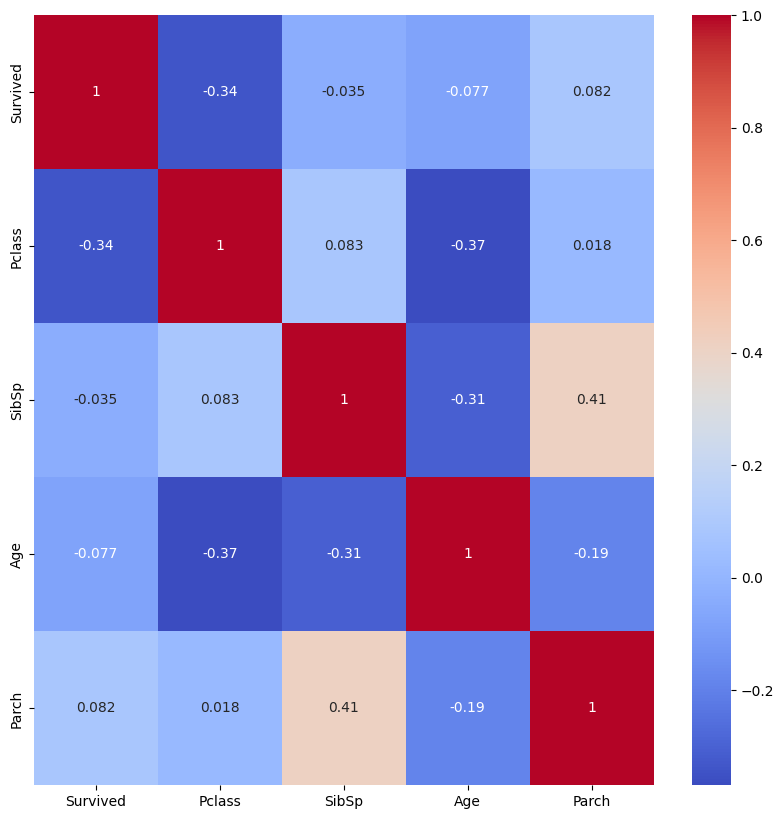

In [2]:
data = pd.read_csv('Titanic - train.csv')

plt.figure(figsize=(10, 10))
sns.heatmap(data[['Survived', 'Pclass', 'SibSp', 'Age', 'Parch']].corr(), annot=True, cmap='coolwarm')
plt.show()

Procesamiento EDAS

In [3]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['FamSize'] = data['SibSp'] + data['Parch']

C:\Users\diego\AppData\Local\Temp\ipykernel_19668\2458019386.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
C:\Users\diego\AppData\Local\Temp\ipykernel_19668\2458019386.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Seleccionar las variales importantes

In [4]:
caracteristicas = ['Pclass', 'Sex', 'SibSp', 'Age', 'Parch', 'FamSize']
X = data[caracteristicas]
y = data['Survived']

Transformando

In [5]:
x_aux = ColumnTransformer(
    transformers=[
     ('cat', OneHotEncoder(), ['Sex']),
     ('num', StandardScaler(), ['Pclass', 'SibSp', 'Age', 'Parch', 'FamSize'])
    ])

X = x_aux.fit_transform(X)

Dividiendo los datos

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Crear y entrenar el modelo

In [7]:
model = LogisticRegression(penalty='l2', C=0.1, solver='liblinear', max_iter=500)
model.fit(x_train, y_train)

LogisticRegression(C=0.1, max_iter=500, solver='liblinear')

Observar los coeficientes del modulo

In [8]:
nombres_carateristicas = x_aux.named_transformers_['cat'].get_feature_names_out(['Sex']).tolist() + ['Pclass', 'SibSp', 'Age', 'Parch', 'FamSize']

In [9]:
coef_caracteristicas = pd.DataFrame({
    'caract': nombres_carateristicas,
    'coef': model.coef_[0],
    'radio': np.exp(model.coef_[0])
})

Evaluar el modelo

In [10]:
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]
print('Acurracy:', accuracy_score(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_proba))
print('Matriz de confusión:\n', confusion_matrix(y_test, y_pred))
print('classificación report:' , classification_report(y_test, y_pred))

Acurracy: 0.8212290502793296
AUC: 0.8772844272844273
Matriz de confusión:
 [[93 12]
 [20 54]]
classificación report:               precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



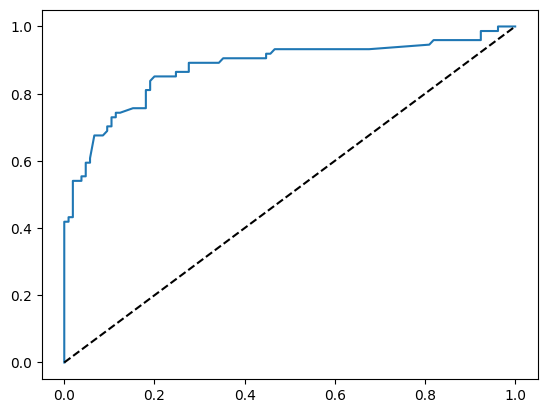

In [11]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')

KMEANS

In [12]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from scipy.spatial import distance

Generar datos sinteticos

In [13]:
x,y = make_classification(n_samples=50, n_features=2, n_clusters_per_class=1,n_informative=2, n_redundant=0, n_repeated=0, flip_y=0.03, class_sep=0.8, scale=30, random_state=42)


Visualización

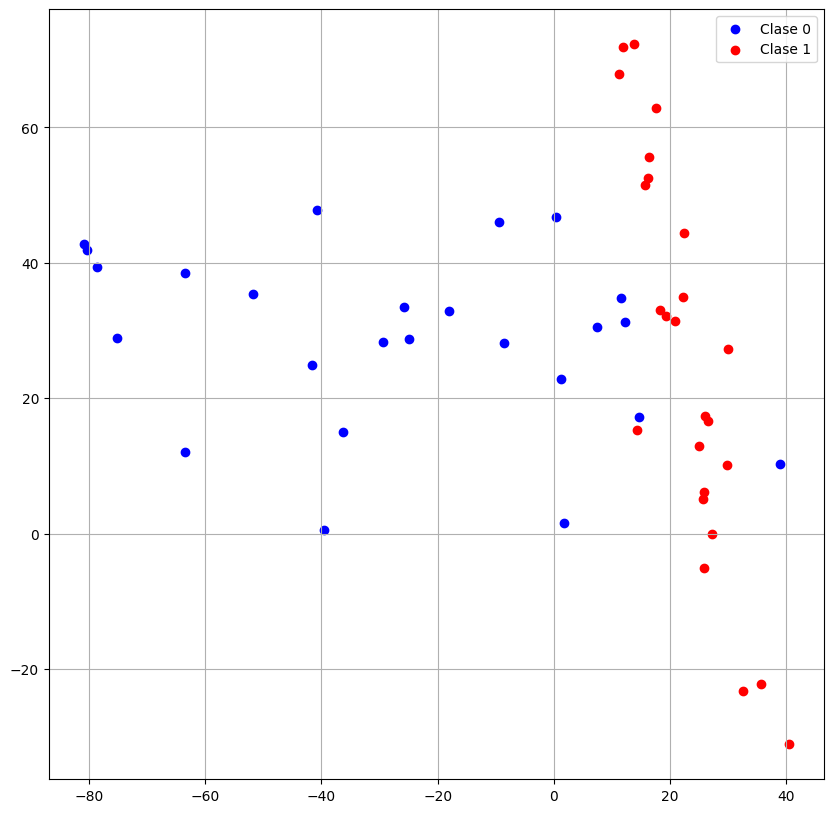

In [14]:
plt.figure(figsize=(10, 10))
plt.scatter(x[y==0][:,0], x[y==0][:,1], color='blue', label='Clase 0')
plt.scatter(x[y==1][:,0], x[y==1][:,1], color='red', label='Clase 1')
plt.legend()
plt.grid()
plt.show()

Inicializar y visualizar los centroides

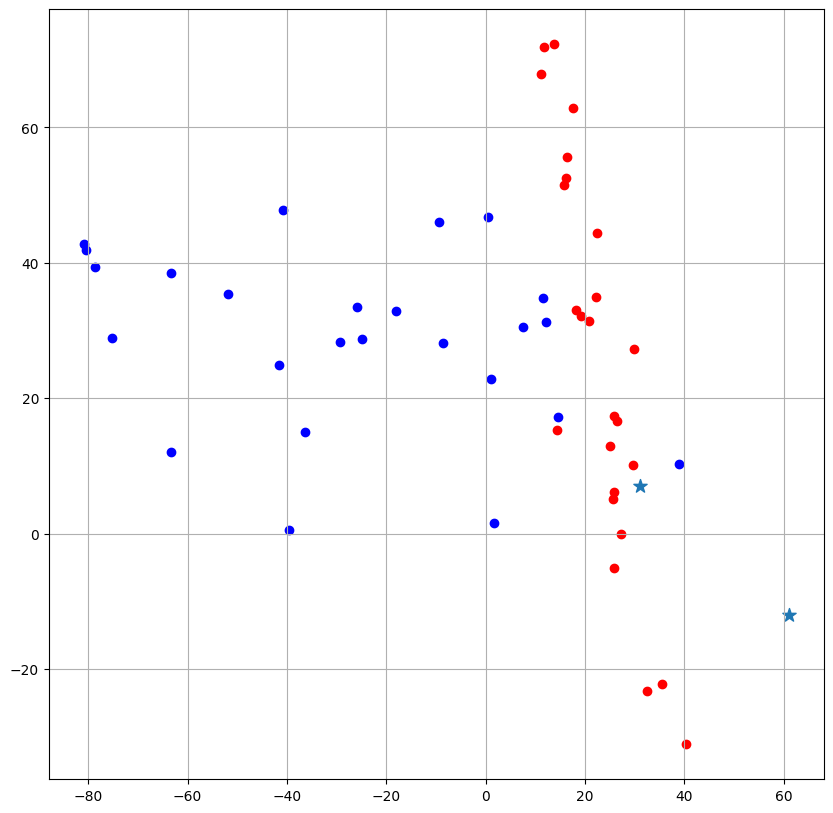

In [15]:
ck = np.random.randint(np.min(x), np.max(x), size=(2, 2))

plt.figure(figsize=(10, 10))
plt.scatter(x[y==0][:,0], x[y==0][:,1], color='blue', label='Clase 0')
plt.scatter(x[y==1][:,0], x[y==1][:,1], color='red', label='Clase 1')
plt.scatter(ck[:,0], ck[:,1], s=100, marker='*')
plt.grid()
plt.show()

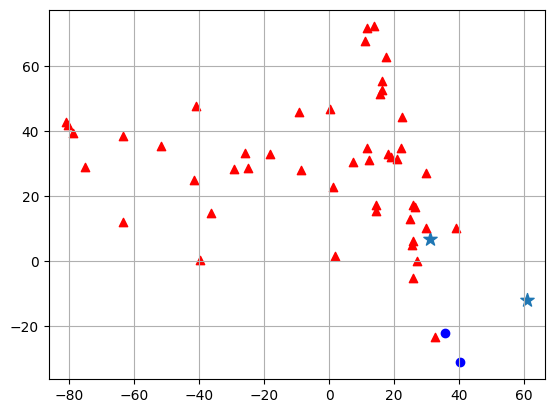

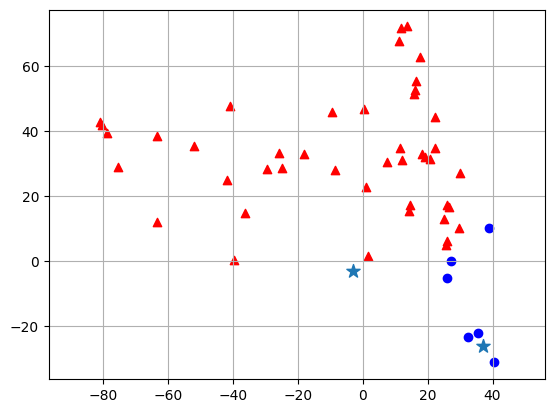

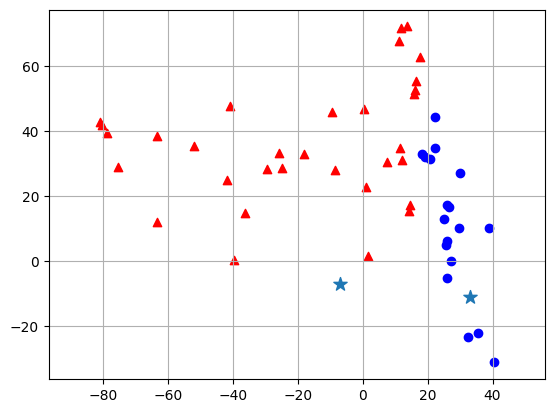

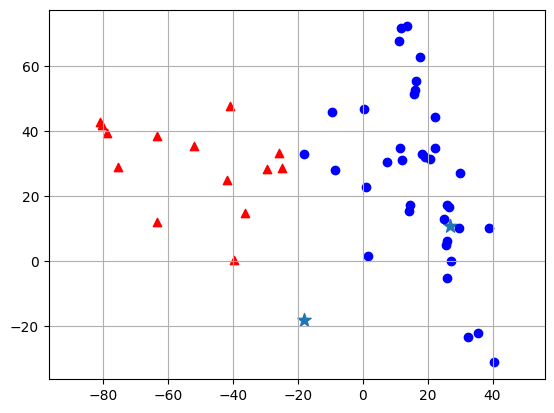

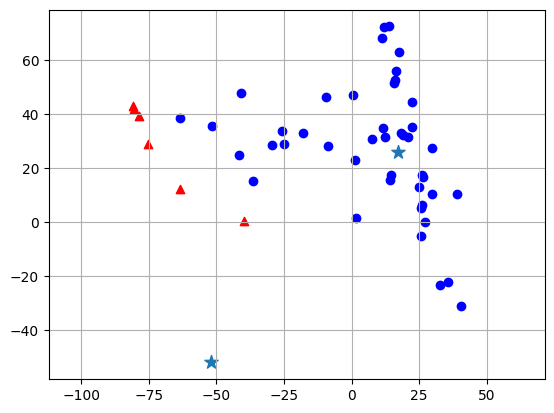

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

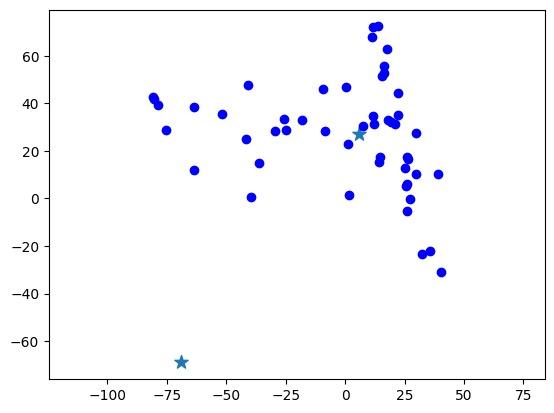

In [16]:
for i in range(10):
    C1 = []
    C2 = []
    i = 0
    for p in x:
        dst1 = distance.euclidean(x[i,:], ck[0,:])
        dst2 = distance.euclidean(x[i,:], ck[1,:])
        if dst1 < dst2:
            C1.append(x[i,:])
        else:
            C2.append(x[i,:])
        i += 1
    C11 = np.array(C1)
    C22 = np.array(C2)

    plt.axis('equal')
    #plt.figure(figsize=(10, 10))
    plt.scatter(ck[:,0], ck[:,1], s=100, marker='*')
    plt.scatter(C11[:,0], C11[:,1], c='b', label='Clase 1', marker='o')
    plt.scatter(C22[:,0], C22[:,1], c='r', label='Clase 2', marker='^')
    plt.grid()
    plt.show()
    plt.pause(0.5)
    
    ck[0,0] = np.mean(C11[:,0])
    ck[0,1] = np.mean(C11[:,1])
    ck[1,0] = np.mean(C22[:,0])
    ck[1,1] = np.mean(C22[:,0])


ARBOLES DE DESICION

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree

Cargar dataset

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

Dividir y entrenar el modelo

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

Evaluar el modelo

In [ ]:
y_pred = model.predict(x_test)
print('Acurracy:', accuracy_score(y_test, y_pred))
print('Matriz de confusión:\n', confusion_matrix(y_test, y_pred))
print('classificación report:' , classification_report(y_test, y_pred))

Acurracy: 1.0
Matriz de confusión:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
classificación report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



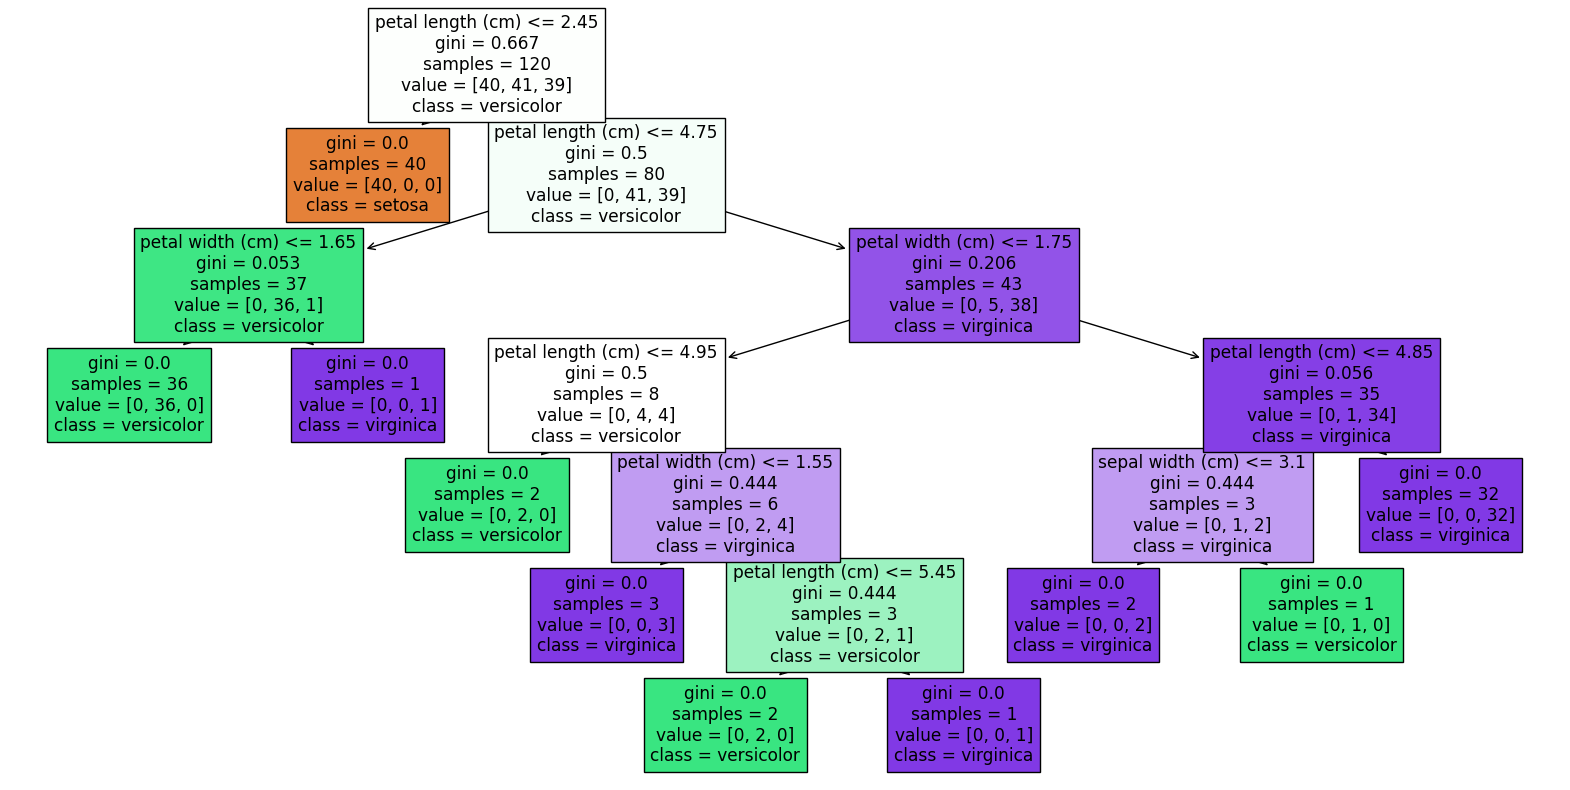

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

Visualización basica de la importancia de las caracteristicas

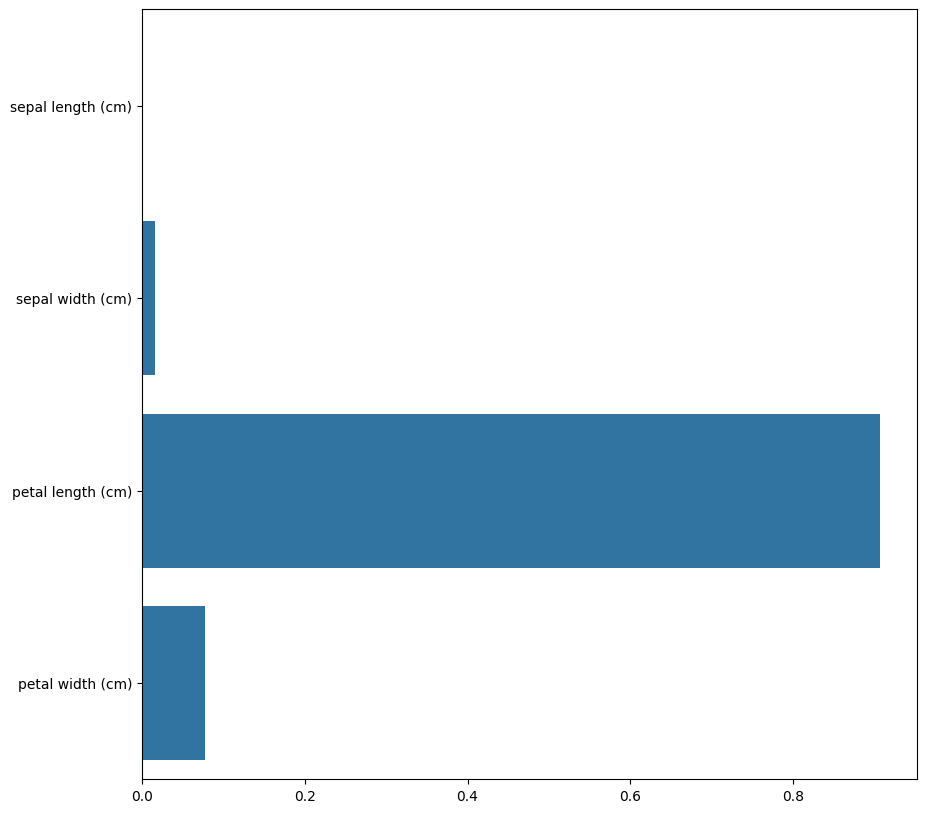

In [ ]:
import seaborn as sns
importancia = model.feature_importances_
plt.figure(figsize=(10, 10))
sns.barplot(x=importancia, y=iris.feature_names)
plt.show()